In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('insurance_data.csv')
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


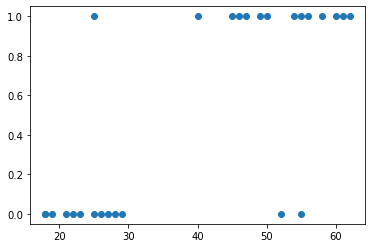

In [3]:
plt.scatter(df['age'], df['bought_insurance'])

We can see that the data above is cannot be predicted using Linear Regression. The data is in the form of yes or no values succh as 0 and 1. The values are discrete. In such cases we use Logistic Regression.

## Logistic Regression

#### Lgistic regression is basically a supervised classification algorithm. In a classification problem, the target variable(or output), y, can take only discrete values for a given set of features(or inputs), X. Contrary to popular belief, logistic regression IS a regression model.

#### Logistic Regression works by using a sigmoid function.

## f(x) = 1 / 1 + e^(-z)

#### This function converts the values between 0 and 1.

#### suppose the line of Linear Regression is y = mx+b, The logistic regression function will interpret it as 1 / 1+e^(-y)

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[['age']],df.bought_insurance,train_size=0.8)

In [5]:
from sklearn.linear_model import LogisticRegression

In [6]:
logReg = LogisticRegression()

In [7]:
len(X_train)

21

In [8]:
len(X_test)

6

In [9]:
logReg.fit(X_train, y_train)

LogisticRegression()

In [10]:
logReg.predict([[35]])

array([0], dtype=int64)

In [11]:
y_test_predic = logReg.predict(X_test)
y_test_predic

array([0, 1, 1, 1, 0, 0], dtype=int64)

In [12]:
logReg.score(X_test, y_test)

0.8333333333333334

In [13]:
y_test

20    0
6     0
14    1
5     1
1     0
0     0
Name: bought_insurance, dtype: int64

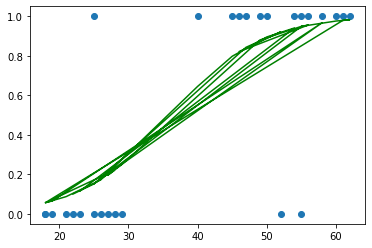

In [19]:
plt.scatter(df['age'],df['bought_insurance'])
plt.plot(df['age'], logReg.predict_proba(df[['age']])[:,1], color='g')

In [22]:
logReg.predict_proba(df[['age']])
# The first column is the probability that the entry has the -1 label.
# The second column is the probability that the entry has the +1 label.

array([[0.8992358 , 0.1007642 ],
       [0.8487065 , 0.1512935 ],
       [0.15707451, 0.84292549],
       [0.07915073, 0.92084927],
       [0.1786675 , 0.8213325 ],
       [0.0442361 , 0.9557639 ],
       [0.05126055, 0.94873945],
       [0.02431617, 0.97568383],
       [0.01795955, 0.98204045],
       [0.02090268, 0.97909732],
       [0.9430953 , 0.0569047 ],
       [0.7790642 , 0.2209358 ],
       [0.80454993, 0.19545007],
       [0.75128258, 0.24871742],
       [0.12029158, 0.87970842],
       [0.05126055, 0.94873945],
       [0.8487065 , 0.1512935 ],
       [0.03284741, 0.96715259],
       [0.93419766, 0.06580234],
       [0.9430953 , 0.0569047 ],
       [0.9124177 , 0.0875823 ],
       [0.82774581, 0.17225419],
       [0.35506228, 0.64493772],
       [0.20251572, 0.79748428],
       [0.10485299, 0.89514701],
       [0.05933119, 0.94066881],
       [0.88432145, 0.11567855]])

### Using math to create a custom sigmoid function

In [23]:
import math

def sigmoid(x):
    return 1/(1+math.exp(-x))

In [26]:
def predict_func(x):
    y = logReg.coef_ * x + logReg.intercept_
    z = sigmoid(y)
    if z < 0.5:
        return 0
    else:
        return 1

In [27]:
predict_func(20)

0

In [29]:
predict_func(60)

1

### Data Exploration and Logistic Regression on HR analysis data
Dataset is downloaded from Kaggle. Link: https://www.kaggle.com/giripujar/hr-analytics

In [31]:
df = pd.read_csv('HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


We need to check how each attribute affects the employee leaving the company

In [32]:
emp_left = df[df.left==1]
emp_left.shape

(3571, 10)

3571 employee left the company

In [33]:
emp_retained = df[df.left == 0]
emp_retained.shape

(11428, 10)

11428 employee do not left

In [34]:
# now we will find the mean of all columns and will group them by employee left

m = df.groupby('left').mean()
m

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


From the table above we can see that last_evaluation, number_project, time_spend_company did not affect much.

**Satisfaction Level**: Satisfaction level seems to be relatively low (0.44) in employees leaving the firm vs the retained ones (0.66)

**Average Monthly Hours**: Average monthly hours are higher in employees leaving the firm (199 vs 207)

**Promotion Last 5 Years**: Employees who are given promotion are likely to be retained at firm

**Work_accident**: 0.17 for employee left and 0.04 for retained

Even after this data we have another parameter salary in text form. We will use barchart for its exploration.

<AxesSubplot:xlabel='salary'>

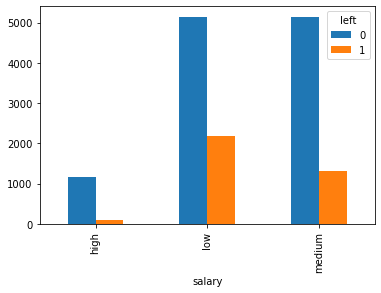

In [35]:
pd.crosstab(df.salary, df.left).plot(kind='bar')

We can see that people with high salary tend not to leave the company..

<AxesSubplot:xlabel='Department'>

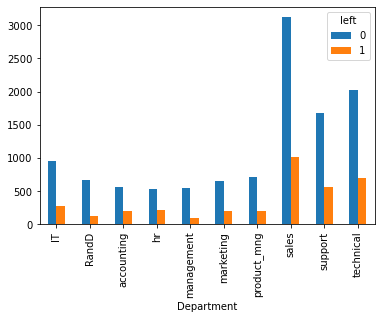

In [36]:
# department vise
pd.crosstab(df.Department,df.left).plot(kind='bar')

We can see that department dosen't affect much.

In [37]:
# Now we have to create a dataframe from the variables we have decided

subDf = df[['satisfaction_level', 'average_montly_hours', 'Work_accident', 'promotion_last_5years', 'salary']]
subDf.head()

,satisfaction_level,average_montly_hours,Work_accident,promotion_last_5years,salary
0,0.38,157,0,0,low
1,0.80,262,0,0,medium
2,0.11,272,0,0,medium
3,0.72,223,0,0,low
4,0.37,159,0,0,low


As salary is in String form we have to take dummy variables for it.

In [38]:
salary_dummies = pd.get_dummies(subDf.salary, prefix='salary')
salary_dummies

,salary_high,salary_low,salary_medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
14994,0,1,0
14995,0,1,0
14996,0,1,0
14997,0,1,0


In [40]:
subDf = pd.concat([subDf, salary_dummies], axis='columns')
subDf.head()

,satisfaction_level,average_montly_hours,Work_accident,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,0,low,0,1,0
1,0.80,262,0,0,medium,0,0,1
2,0.11,272,0,0,medium,0,0,1
3,0.72,223,0,0,low,0,1,0
4,0.37,159,0,0,low,0,1,0


In [41]:
subDf.drop('salary', axis='columns', inplace=True)
subDf.head()

,satisfaction_level,average_montly_hours,Work_accident,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,0,1,0
1,0.80,262,0,0,0,0,1
2,0.11,272,0,0,0,0,1
3,0.72,223,0,0,0,1,0
4,0.37,159,0,0,0,1,0


In [42]:
# now our X will be subDf and y will be employee left

X = subDf
y = df.left

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7)

In [62]:
len(X_train)

10499

In [63]:
len(X_test)

4500

In [67]:
regLog = LogisticRegression()

In [68]:
regLog.fit(X_train, y_train)

LogisticRegression()

In [73]:
regLog.score(X_test, y_test)

0.78